In [3]:
import cv2 
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [4]:
# Load image
test_image = cv2.imread('data.jpg')

In [5]:
# Convert the image to gray imag as openCV face detector expcts gray images
gray_test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)

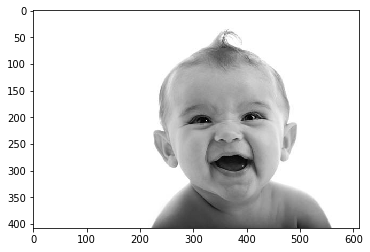

In [6]:
plt.imshow(gray_test_image,cmap='gray')

In [7]:
# Load cascade classifier training file for haar_cascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

In [8]:
# This returns a list of positions of face in form "Rect(x,y,w,h)"
faces = haar_face_cascade.detectMultiScale(gray_test_image, scaleFactor = 1.2 , minNeighbors =5)

In [9]:
print("Faces Found : {}".format(str(len(faces))))

Faces Found : 1


In [10]:
#opncv loads the image in BGR color..thus we convert it to RGB again
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
# loop ove the list of faces and draw them as rectangle
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),5)

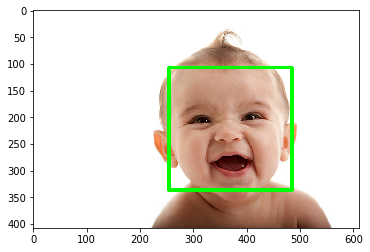

In [12]:
# call the RGB convertor defind above
plt.imshow(convertToRGB(test_image))

In [13]:
import matplotlib.patches as patches
import matplotlib.cbook as cbook

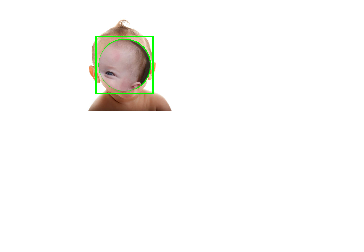

In [14]:
with cbook.get_sample_data('C:/Users/jsidd/Desktop/TensorFLow/Facial-Detection-Recognition/data/test3.jpg') as image_file:
    image = plt.imread(image_file)

    
fig, ax = plt.subplots()
for (x,y,w,h) in faces:
    cx,cy = round(x +w/2) , round(y +h/2)
    q = w/2
    e = h/2
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),5)
    cv2.circle(test_image,(int(cx),int(cy)),int(w/2.2),(0,255,0),4)
ax.imshow(convertToRGB(test_image))
im = ax.imshow(image)
patch = patches.Circle((int(cx),int(cy)),int(w/2.2), transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()

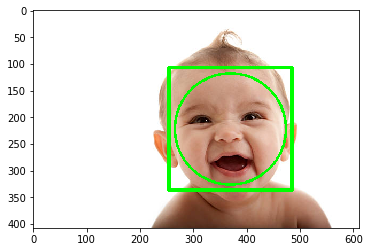

In [15]:
for (x,y,w,h) in faces:
    cx,cy = round(x +w/2) , round(y +h/2)
    q = w/2
    e = h/2
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),5)
    cv2.circle(test_image,(int(cx),int(cy)),int(w/2.2),(0,255,0),4)
plt.imshow(convertToRGB(test_image))
plt.Circle((int(cx),int(cy)),int(w/2.2))
plt.show()

OR you can define a function for this code

In [16]:
def detect_faces(f_cascade ,img ,scaleFactor = 1.2):
    # make a copy so that the original image is not changed
    img_copy = img.copy()
    # convert to gray image as opencv expects gray images
    gray_image = cv2.cvtColor(img_copy , cv2.COLOR_BGR2GRAY)
    # ScaleFactor parametr for : some images may be closer than others
    faces = f_cascade.detectMultiScale(gray_image , scaleFactor = scaleFactor ,minNeighbors=5)
    # loop over the list of faces
    for (x,y,w,h) in faces:
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),5)
    return img_copy

In [17]:
# Load image 
test_image2 = cv2.imread('data/test3.jpg')

In [18]:
# To calculate the Time
start_time = time.time()
# To call our function to detect faces
face_detected_image =  detect_faces(haar_face_cascade, test_image2)
end_time = time.time()

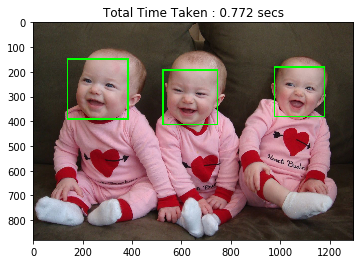

In [19]:
plt.title('Total Time Taken : {} secs'.format(round(end_time-start_time,3)))
plt.imshow(convertToRGB(face_detected_image))

In [20]:
import numpy as np

In [ ]:
np.